# The Moran Process


This process describes the dynamics of a population of $N$ interacting species $X_i$ governed by the reactions


$$
X_i+X_j\xrightarrow{\alpha_i}2X_i
$$

this means species $X_i$ eats species $X_j$ and replicates immediately, which conserves the number of individuals in the total population. 

The Moran process is driven by the associated chemical Master equation for the state $\mathbf{n}(t)$ of the system that is defined by the number of individuals $n_i(t)$ of species $X_i$ in the population.

Parameters to specify are the replication rates $\alpha_i$ and the conserved population size $N$. 

In the limit $N\rightarrow\infty$ the dynamics for the fraction of species is governed by the replicator equation

$$
\dot x_i = x_i(\alpha_i-\phi)
$$

with $\phi=\sum_k x_i \alpha_i$.

## The diffusion approximation

In the limit of large population size $N$ the dynamics of the Moran process can be approximated by a diffusion process:

$$
dx_{i}=x_{i}(\alpha_{i}-\phi)dt+\frac{1}{\sqrt{N}}\sum_{j}\sqrt{x_{i}x_{j}}\left(\sqrt{\alpha_{i}}dW_{ij}-\sqrt{\alpha_{j}}dW_{ji}\right).
$$

where $dW_{ij}$ are independent increments of the Wiener process and $x_i(t)=n_i(t)/N$ are the fraction of species $i$ in the population.


The function ```moran``` in the package can do both, solve the particle kinectic, discrete population process, as well as the diffusion approximation. You can do this by setting the keyword ```diffusion_approximation=True```.


In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from stopro import moran

def replicator(x,t,a):
    phi = np.sum(a*x)
    return x*(a-phi)

## This is just for colors of the plots
from palettable.wesanderson import GrandBudapest3_6
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=GrandBudapest3_6.mpl_colors)
## --------

In [5]:
ic = [100,200,300] # initial number of individuals of each species
population_size = np.sum(ic) # total number of individuals
alpha = np.array([3,2,1]) # replication rates of each species
T = 10 # integration time
samples = 5 # number of samples
t = np.linspace(0,T,100)

# here is the solution of the deterministic replicator system for comparison
sol = odeint(replicator,  np.array(ic/np.sum(ic)), t  , args=(alpha,))
# here are the realizations of the moran process
res = moran(T,population_size,alpha=alpha,N=3,samples=samples,normalize=True,initial_condition=ic)


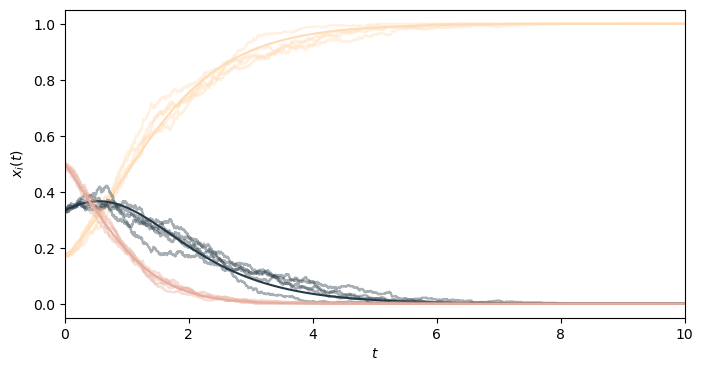

In [6]:
fig,ax = plt.subplots(figsize=[8,4])
for i in range(res['N']):
    for j in range(res['samples']):    
        ax.plot(res['Xt'][j][0],res['Xt'][j][1][i],color='C'+str(i),alpha=0.4)
    ax.plot(t,sol[:,i],color='C'+str(i))
    ax.set_xlim([0,T])
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$x_i(t)$')


## Here's the diffusion approximation with the same parameters:

In [11]:
ic = [100,200,300] # initial number of individuals of each species
population_size = np.sum(ic) # total number of individuals
icx = ic/population_size
dt = 0.01
alpha = np.array([3,2,1]) # replication rates of each species
T = 10 # integration time
samples = 5 # number of samples
t = np.linspace(0,T,100)

# here is the solution of the deterministic replicator system for comparison
sol = odeint(replicator,  np.array(ic/np.sum(ic)), t  , args=(alpha,))
# here are the realizations of the moran process
res = moran(T,population_size,alpha=alpha,N=3,samples=samples,normalize=True,
            initial_condition=icx,diffusion_approximation=True,dt=dt)


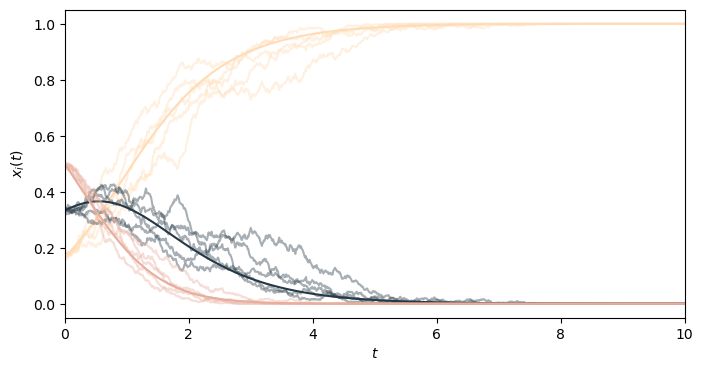

In [12]:
fig,ax = plt.subplots(figsize=[8,4])
for i in range(res['N']):
    for j in range(res['samples']):    
        ax.plot(res['Xt'][j][0],res['Xt'][j][1][i],color='C'+str(i),alpha=0.4)
    ax.plot(t,sol[:,i],color='C'+str(i))
    ax.set_xlim([0,T])
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$x_i(t)$')

In [82]:
population_size = 100
alpha = 2.0
T = 100 # integration time
samples = 50 # number of samples

res = moran(T,population_size,samples=samples,normalize=True)


Text(0.5, 0, '$t$')

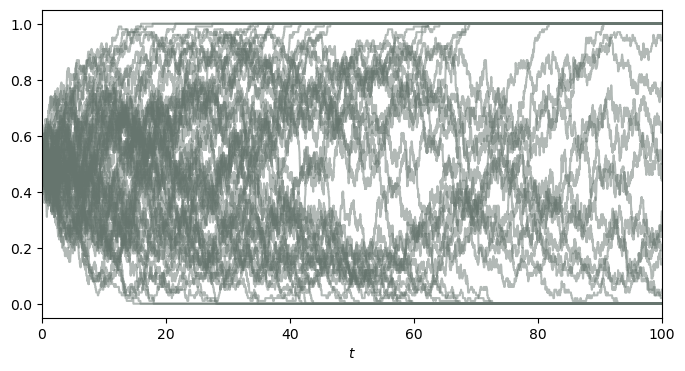

In [84]:
fig,ax = plt.subplots(figsize=[8,4])

for j in range(res['samples']):    
    ax.plot(res['Xt'][j][0],res['Xt'][j][1][0],color='C3',alpha=0.5)

ax.set_xlim([0,T])
ax.set_xlabel(r'$t$')

